## CO2 Emissions - Analysis - Dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country

In [83]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import plotly 
import kagglehub
import os 
from typing import Optional, Callable
sns.set_style("whitegrid")

#### Downloading the dataset

In [84]:
path = kagglehub.dataset_download("ulrikthygepedersen/co2-emissions-by-country")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\ulrikthygepedersen\co2-emissions-by-country\versions\1


In [85]:
dir_files = os.listdir(path)

In [86]:
df = pd.read_csv(os.path.join(path,dir_files[0]))

#### EDA

In [87]:
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [88]:
rows,cols = df.shape

print("Number of rows: {}\nNumber of columns: {}".format(rows,cols))

Number of rows: 13953
Number of columns: 4


In [89]:
df.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [90]:
df.isna().sum()

country_code    0
country_name    0
year            0
value           0
dtype: int64

In [91]:
unique_countries = df['country_code'].unique()

In [92]:
len(unique_countries)

255

In [93]:
unique_countries

array(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE',
       'ARG', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN',
       'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU',
       'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB',
       'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU',
       'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR', 'EAS', 'ECA',
       'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU',
       'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL',
       'GTM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN',
       'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX', 'IND', 'IRL', 'IRN',
       'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO', 'LBN',
       'LBR', 'LBY',

In [94]:
unique_years = df['year'].unique()

unique_years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

In [95]:
mean_of_co2_emissions = np.mean(df['value'])
median_of_co2_emissions = np.median(df['value'])
std_of_co2_emissions = np.std(df['value'])

print(f"Mean of CO2 Emissions: {mean_of_co2_emissions}\nmedian of CO2 emissions: {median_of_co2_emissions}\nStandard deviation of CO2 emissions: {std_of_co2_emissions}")

Mean of CO2 Emissions: 825498.3433543197
median of CO2 emissions: 13900.0
Standard deviation of CO2 emissions: 2788823.270974496


In [96]:
def get_parameter_of_country_co2_per_year(df:pd.DataFrame,country_code: str, year: int,func: Callable[[pd.Series],int]) -> int: 

    df = df[(df['country_code'] == country_code) & (df["year"] == year)]

    return func(df['value'])

def get_parameter_of_co2_per_year(df:pd.DataFrame, year: int,func: Callable[[pd.Series],int]) -> int: 

    df = df[(df["year"] == year)]
    return func(df['value'])






In [97]:
print(get_parameter_of_country_co2_per_year(df=df,country_code='USA',year=1960,func=np.std))

0.0


In [98]:
mean_of_years_dict = {
    year: get_parameter_of_co2_per_year(df, year=year, func=np.mean) 
    for year in unique_years
}


In [99]:
mean_of_years_dict

{1960: 379506.4144740046,
 1961: 374035.3118242009,
 1962: 381505.0063398048,
 1963: 401537.0093823474,
 1964: 411765.54175988573,
 1965: 435207.10423407506,
 1966: 458757.0027527678,
 1967: 473560.4017063476,
 1968: 499497.2688882719,
 1969: 533679.8169571378,
 1970: 580147.0364277061,
 1971: 606344.634916112,
 1972: 632715.6657126748,
 1973: 667204.209644276,
 1974: 673138.5261672913,
 1975: 685908.7579536294,
 1976: 722682.0771588641,
 1977: 748199.5558445349,
 1978: 780178.0237864238,
 1979: 801543.948708541,
 1980: 804796.8123877188,
 1981: 786758.7206840547,
 1982: 793344.5382590732,
 1983: 804491.8602966211,
 1984: 827727.4319285579,
 1985: 866311.5010118412,
 1986: 880349.2528735833,
 1987: 905029.2584415575,
 1988: 940153.2865261303,
 1989: 952510.1357841701,
 1990: 702520.3130837166,
 1991: 708300.9502696596,
 1992: 708122.6978728797,
 1993: 712090.3474217639,
 1994: 713394.9259562326,
 1995: 736544.1719210037,
 1996: 750463.0569971823,
 1997: 761957.1347566666,
 1998: 767017

Text(0.5, 1.0, 'CO2 emissions variation per years 1960-2020')

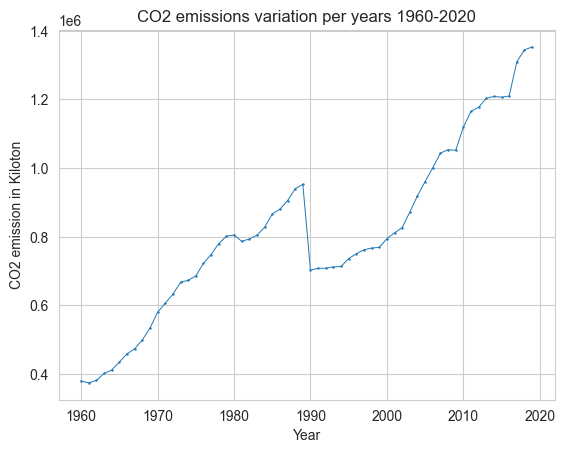

In [102]:
plt.plot(list(mean_of_years_dict.keys()),list(mean_of_years_dict.values()),marker='o',markersize=0.75,linestyle='-',linewidth=0.7)
plt.xlabel("Year")
plt.ylabel("CO2 emission in Kiloton")
plt.title("CO2 emissions variation per years 1960-2020")